## **1. 新闻发布时间滞后分析** ##

In [1]:
import pandas as pd

d:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [32]:
data = pd.read_excel('E:/厦门大学/论文合作/大模型+新闻情绪/test_data.xlsx')

d:\Anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [33]:

data = data.drop([0, 1], axis=0)

In [34]:
data['text_length'] = data['NewsContent'].apply(lambda x: len(str(x)))

In [35]:
import re
from datetime import datetime
def extract_date(text):
    # 正则表达式确保同时有“月”和“日”部分
    match = re.search(r'(\d{1,2})月(\d{1,2})日', str(text))
    if match:
        month = int(match.group(1))
        day = int(match.group(2))
        # 默认为2024年
        date_str = f'2024-{month:02d}-{day:02d}'
        try:
            date_obj = datetime.strptime(date_str, '%Y-%m-%d')
            return date_obj
        except ValueError:
            return None
    return None

data['news_data'] = data['NewsContent'].apply(extract_date)

In [36]:
def convert_declare_date(declare_date):
    try:
        declare_obj = datetime.strptime(str(declare_date), '%Y-%m-%d %H:%M:%S')
        return declare_obj
    except Exception as e:
        return None

data['declare_data'] = data['FullDeclareDate'].apply(convert_declare_date)

In [37]:
def calculate_gap_day(row):
    if pd.notna(row['news_data']) and pd.notna(row['declare_data']):
        return (row['news_data'] - row['declare_data']).days
    elif pd.isna(row['news_data']) and pd.notna(row['declare_data']):
        return None
    return None
data['gap_day'] = data.apply(calculate_gap_day, axis=1)

In [49]:
def handle_missing_news_data(row):
    if pd.isna(row['news_data']):
        text = str(row['NewsContent'])
        if '昨天' in text or '昨日' in text:
            return -1
        elif '前日' in text or '前天' in text:
            return -2
        elif '近日' in text:
            return -1
    return None
data['gap_day'] = data.apply(lambda row: handle_missing_news_data(row) if pd.isna(row['gap_day']) else row['gap_day'], axis=1)

In [50]:
# 仅筛选gap_day列中值在-2到10之间的行
filtered_data = data[(data['gap_day'] >= -6) & (data['gap_day'] <= 9)]

# 统计gap_day列的出现次数
gap_day_counts = filtered_data['gap_day'].value_counts().sort_index()

# 计算每个取值的频率
gap_day_freq = gap_day_counts / len(filtered_data)

# 显示统计结果
result = pd.DataFrame({
    'Count': gap_day_counts,
    'Frequency': gap_day_freq
})

print(result)


          Count  Frequency
gap_day                   
-6.0       1777   0.007114
-5.0       2616   0.010473
-4.0       5850   0.023421
-3.0       8703   0.034843
-2.0      39253   0.157153
-1.0     183100   0.733060
 0.0       4641   0.018581
 1.0       1901   0.007611
 2.0        511   0.002046
 3.0        305   0.001221
 4.0        270   0.001081
 5.0        232   0.000929
 6.0        230   0.000921
 7.0        170   0.000681
 8.0        108   0.000432
 9.0        108   0.000432


In [27]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','no-latex'])

Locator attempting to generate 2563 ticks ([-369.2, ..., 143.19999999999817]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2563 ticks ([-369.2, ..., 143.19999999999817]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2563 ticks ([-369.2, ..., 143.19999999999817]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2563 ticks ([-369.2, ..., 143.19999999999817]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2563 ticks ([-369.2, ..., 143.19999999999817]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2563 ticks ([-369.2, ..., 143.19999999999817]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2563 ticks ([-369.2, ..., 143.19999999999817]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2563 ticks ([-369.2, ..., 143.19999999999817]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2563 ticks ([-369.2, ...,

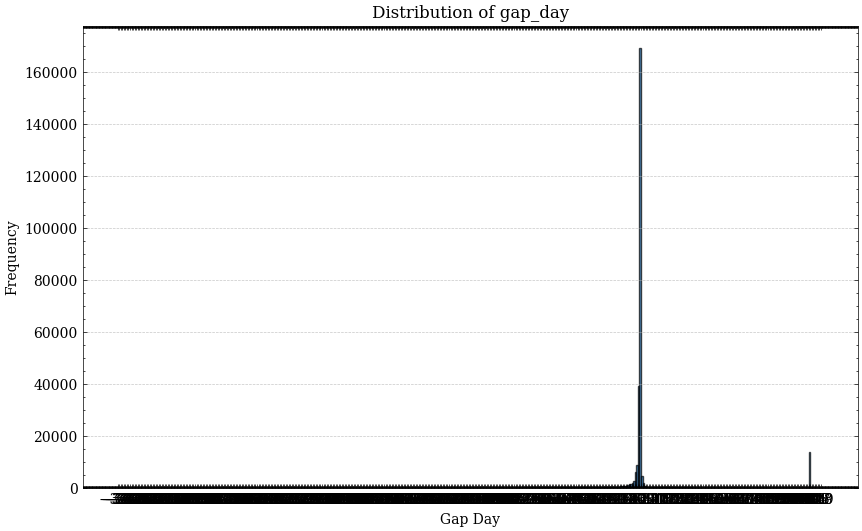

In [28]:
# 绘制gap_day的直方图
plt.figure(figsize=(10, 6))
plt.hist(data['gap_day'].dropna(), bins=range(int(data['gap_day'].min()), int(data['gap_day'].max()) + 2), edgecolor='black', alpha=0.7)
plt.title('Distribution of gap_day')
plt.xlabel('Gap Day')
plt.ylabel('Frequency')
plt.xticks(range(int(data['gap_day'].min()), int(data['gap_day'].max()) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图形
plt.show()

## **2. 新闻统计分析** ##

In [4]:
import pandas as pd


def main():
    # 读取 xlsx 文件
    df = pd.read_excel('../DATA/test_data.xlsx')
    # 获取 NewsContent 列
    news_content = df['NewsContent']
    max_length = 0
    max_index = None
    max_content = None
    for index, content in news_content.items():
        if isinstance(content, str) and len(content) > max_length:
            max_length = len(content)
            max_index = index
            max_content = content
    print(f"最长的文本字符数为: {max_length}")
    print(f"该文本位于第 {max_index + 1} 行")
    print(f"内容为: {max_content}")


if __name__ == "__main__":
    main()

d:\Anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


最长的文本字符数为: 2000
该文本位于第 5 行
内容为: 摘要 　　国常会：研究推动保险业高质量发展的若干意见； 　　央行8月净买入国债1000亿元； 　　央行：二季度末个人住房贷款余额37.79万亿元，同比下降2.1%； 　　财政部：将加大财政政策实施力度； 　　商务部等五部门联合出台《推动电动自行车以旧换新实施方案》； 　　中央汇金大幅加仓，继续增持头部宽基ETF； 　　A股上市公司中期分红近5300亿元，创历史新高； 　　广州：全市新房开始推行“买房即交房、交证”。 　　热点聚焦 　　国常会：研究推动保险业高质量发展的若干意见 　　8月30日召开的国务院常务会议，研究推动保险业高质量发展的若干意见，部署落实大食物观相关工作，审议通过《加快完善海河流域防洪体系实施方案》和《网络数据安全管理条例（草案）》，讨论《中华人民共和国海商法（修订草案）》。会议指出，保险业在保障和改善民生、防灾减损、服务实体经济等方面具有重要作用。要夯实保险业高质量发展制度基础，牢固树立服务优先理念，充分发挥商业保险等市场机制作用，大力提升保险业保障能力和服务水平。要紧盯关键领域和薄弱环节加强监管，保障消费者合法权益，健全风险防范制度体系。要培育壮大保险资金等耐心资本，打通制度障碍，完善考核评估机制，为资本市场和科技创新提供稳定的长期投资。 　　央行8月净买入国债1000亿元 　　中国人民银行8月30日首次发布国债买卖业务公告称，为贯彻落实中央金融工作会议相关要求，8月人民银行开展了公开市场国债买卖操作，向部分公开市场业务一级交易商买入短期限国债并卖出长期限国债，全月净买入债券面值为1000亿元。央行净买入1000亿元国债，实际是向公开市场投放了基础货币。“这表明了央行支持性的货币政策立场，预示着后续流动性的合理充裕状态。”民生银行首席经济学家温彬对证券时报记者表示。随着公开市场国债买卖操作正式纳入货币政策工具箱，金融资源的配置效率有望进一步提升。受访专家学者认为，央行通过增加国债的买卖规模和频率精准调控银行间流动性，并避免再贷款等工具大规模到期续作时的扰动。 　　央行：二季度末个人住房贷款余额37.79万亿元同比降2.1% 　　央行发布2024年二季度金融机构贷款投向统计报告，2024年二季度末，房地产开发贷款余额13.77万亿元，同比增长2.8%，增速比上年末高1.3个百分点，上

## **3. 情绪词典提取txt格式** ##

In [6]:
import re

input_file = '../DATA/ori_senti_bignomics.txt'  # 输入文件名
output_file = '../DATA/process_senti_dic_EN.txt'  # 输出文件名

pattern = r"senti_bignomics\['(.*?)'\] = \['(.*?)'\]"

with open(input_file, 'r', encoding='utf-8') as f_in, \
     open(output_file, 'w', encoding='utf-8') as f_out:
    
    for line in f_in:
        # 提取两个方括号内的内容
        match = re.search(pattern, line.strip())
        if match:
            word = match.group(1)        # 第一个方括号内容 (abandon)
            score = match.group(2)       # 第二个方括号内容 (-0.5)
            f_out.write(f"{word}\t{score}\n")

print("处理完成！输出文件已保存为:", output_file)

处理完成！输出文件已保存为: ../DATA/process_senti_dic_EN.txt


### **新闻段落切割的前期统计***

In [1]:
import pandas as pd
from multiprocessing import Pool
from tqdm import tqdm


def check_newline_count(row):
    try:
        return isinstance(row, str) and row.count('\n') >= 2
    except AttributeError:
        return False


def parallel_process(df):
    with Pool() as pool:
        results = list(tqdm(pool.imap(check_newline_count, df['NewsContent']), total=len(df), desc="Processing"))
    return sum(results)


if __name__ == "__main__":
    # 读取 Excel 文件
    df = pd.read_excel('/root/onethingai-fs/mydata/newspaper/sjjjbd21_331443.xlsx')

    # 并行处理数据
    count = parallel_process(df)

    # 计算总样本数量
    total = len(df)

    # 计算比例
    proportion = count / total

    print(f'至少有 2 个\\n的样本比例为: {proportion:.2%}')

Processing: 100%|██████████| 331443/331443 [00:36<00:00, 9140.23it/s] 


至少有 2 个\n的样本比例为: 75.79%


In [2]:
import pandas as pd
from multiprocessing import Pool
from tqdm import tqdm


def count_total_chars(row):
    return len(row) > 8000


def parallel_process(df):
    with Pool() as pool:
        results = list(tqdm(pool.imap(count_total_chars, df['NewsContent']), total=len(df), desc="Processing"))
    return sum(results)


if __name__ == "__main__":
    # 读取 Excel 文件


    # 并行处理数据
    count = parallel_process(df)

    # 计算总样本数量
    total = len(df)

    # 计算比例
    proportion = count / total

    print(f'总字数在 8000 以上的新闻比例为: {proportion:.2%}')

Processing: 100%|██████████| 285363/285363 [00:22<00:00, 12448.05it/s]


总字数在 8000 以上的新闻比例为: 0.08%


### **RAG之后的列展开***

In [ ]:
import pandas as pd
import json
import re

# ✅ 设置要保留的原始列（可以按需修改）
columns_to_keep = ['DeclareDate', 'Title','NewsContent', 'NewsSource', 'yearmonth']  # 举例：只保留这两列

# ✅ 读取原始 Excel 文件
df = pd.read_excel("/root/onethingai-fs/mydata/newspaper/process_data/sjjjbd21_331443_rag_middle.xlsx")

# ✅ 提取 JSON 中的字段
def extract_json_fields(cell):
    try:
        if pd.isna(cell):
            return pd.DataFrame()
        json_obj = json.loads(str(cell))
        result = []
        for context, value in json_obj.items():
            result.append({
                'context': context,
                'topic': value.get('topic'),
                'similarity': value.get('similarity'),
                'prompt': value.get('prompt')
            })
        return pd.DataFrame(result)
    except Exception as e:
        print(f"解析失败：{e}\n内容为：{cell}")
        return pd.DataFrame()

# ✅ 从 prompt 中提取新闻文本和情绪词典
def extract_from_prompt(prompt):
    try:
        match = re.search(r'新闻文本是“(.*?)”，包含的情绪词典是：(.*)', prompt)
        if match:
            news_text = match.group(1)
            sentiment_dict = match.group(2)
            return pd.Series({'cut_news': news_text, 'sentiment_dict': sentiment_dict})
        else:
            return pd.Series({'cut_news': None, 'sentiment_dict': None})
    except Exception as e:
        print(f"提取失败：{e}\n内容为：{prompt}")
        return pd.Series({'cut_news': None, 'sentiment_dict': None})

# ✅ 主处理逻辑
all_rows = []
for i, row in df.iterrows():
    expanded = extract_json_fields(row['cut_news_topic_match'])
    if not expanded.empty:
        for col in df.columns:
            if col != 'cut_news_topic_match':
                expanded[col] = row[col]
        expanded['cut_news_topic_match'] = row['cut_news_topic_match']
        all_rows.append(expanded)

if all_rows:
    final_df = pd.concat(all_rows, ignore_index=True)

    # 保留原始列 + 插入新列
    original_cols = df.columns.tolist()
    extracted_fields = final_df['prompt'].apply(extract_from_prompt)
    final_df = pd.concat([final_df, extracted_fields], axis=1)

    # 可选：只保留你想要的原始列 + 所有新列
    selected_cols = columns_to_keep + [col for col in final_df.columns if col not in df.columns]
    final_df = final_df[selected_cols]

    # final_df.to_excel("parsed_cleaned_0507.xlsx", index=False)
    print("✅ 成功导出到 parsed_cleaned.xlsx")
else:
    print("❌ 没有成功解析任何 JSON 行")
    
value_counts = final_df['topic'].value_counts()
print("每个值的数量:")
print(value_counts)

lengths = final_df['context'].str.len()

# 计算平均长度
average_length = lengths.mean()

print(f"context 列的平均长度为: {average_length}")

✅ 成功导出到 parsed_cleaned.xlsx


### **窗口划分无段落新闻**

In [ ]:
import pandas as pd
# 计数被添加换行符的行数
modified_rows = 0

# 修改函数以返回是否修改的标志
def add_newlines(text, window=400):
    """
    在文本中添加换行符，规则如下：
    1. 如果文本中已有的换行符数量大于等于2，不做处理
    2. 从文本的第window个字符位置向前查找最近的句号，在该句号后添加换行符
    3. 在处理过的文本中，继续从下一个window字符位置查找
    4. 直到剩余文本长度不足window个字符
    
    返回: (处理后的文本, 是否被修改)
    """
    # 检查已有换行符数量
    if text.count('\n') >= 2:
        return text, False
    
    # 检查文本长度是否需要处理
    if len(text) <= window:
        return text, False
    
    result = ""
    remaining_text = text
    modified = False
    
    while len(remaining_text) > window:
        chunk = remaining_text[:window]
        
        last_period_index = chunk.rfind('。')
        
        if last_period_index == -1:
            last_period_index = chunk.rfind('！')
        if last_period_index == -1:
            last_period_index = chunk.rfind('？')
        if last_period_index == -1:
            last_period_index = chunk.rfind('.')
        
        if last_period_index == -1:
            result += remaining_text[:window] + '\n'
            remaining_text = remaining_text[window:]
        else:
            result += remaining_text[:last_period_index + 1] + '\n'
            remaining_text = remaining_text[last_period_index + 1:]
        
        modified = True
    
    result += remaining_text
    
    return result, modified

# 应用函数并统计修改的行数
def process_text(x, window=400):
    # 检查是否为NaN或None
    if pd.isna(x) or x is None:
        return x  # 如果是NaN值，直接返回不处理
    
    try:
        processed_text, was_modified = add_newlines(x, window)
        global modified_rows
        if was_modified:
            modified_rows += 1
        return processed_text
    except Exception as e:
        # 出现任何错误时，原样返回文本
        print(f"处理文本时出错: {e}, 跳过此行")
        return x

text = """这是一段示。例文本它可能会\n比较长，为了演fasfas f了演fasfas fasfjasfhjg长，为了演fasfas f了演fasfas fasfjasfhjgai示换行的效果，我们。长，为了演fasfas f了演fasfas fasfjasfhjgai示换行的效果，我们。长，为了演fasfas f了演fasfas fasfjasfhjgai示换行的效果，我们。长，为了演fasfas f了演fasfas fasfjasfhjgai示换行的效果，我们。长，为了演fasfas f了演fasfas fasfjasfhjgai示换行的效果，我们。长，为了演fasfas f了演fasfas fasfjasfhjgai示换行的效果，我们。\nai示换行的效果，我们。了演fasfas fasfjasfhjgai示换行的效果，我们。了演fasfas fasfjasfhjgai示换行的效果，我们。了演fasfas fasfjasfhjgai示换行的效果，我们。了演fasfas fasfjasfhjgai示换行的效果，我们。了演fasfas fasfjasfhjgai示换行的效果，我们。了演fasfas fasfjasfhjgai示换行的效果，我们。了演fasfas fasfjasfhjgai示换行的效果，我们。了演fasfas fasfjasfhjgai示换行的效果，我们。asfjasfhjgai示换行的效果，我们。会让。它更长一些这是第。二句话，也需要继续扩展这是第三句话，同样要扩展内容。"""

print(process_text(text))

import pandas as pd
df = pd.read_excel("/root/onethingai-fs/mydata/newspaper/jjrb_468123.xlsx")

# 处理DataFrame
df['NewsContent_process'] = df['NewsContent'].apply(lambda x: process_text(x, window=400))

# 输出统计结果
print(f"总共有 {modified_rows} 行样本被手动划分了段落")

df.to_excel('/root/onethingai-fs/mydata/newspaper/jjrb_468123_mid.xlsx')

In [6]:
import pandas as pd
df = pd.read_excel("/root/onethingai-fs/mydata/newspaper/jjrb_468123.xlsx")

In [7]:
# 处理DataFrame
df['NewsContent_process'] = df['NewsContent'].apply(lambda x: process_text(x, window=400))

# 输出统计结果
print(f"总共有 {modified_rows} 行样本被手动划分了段落")

总共有 27277 行样本被手动划分了段落


In [8]:
df.to_excel('/root/onethingai-fs/mydata/newspaper/jjrb_468123_mid.xlsx')

### **中英混合情绪词只保留英文***

In [11]:
import pandas as pd
df  = pd.read_excel('/root/LLM_news_emo_analyze/emo_match_output_result/train_data_add0522.xlsx')

In [8]:
import re

def extract_bracket_content_and_value(text):
    """
    从文本中提取括号内的内容和后面的分值，支持负数、零和小数
    输入格式例如: "抑制因素/阻碍因素(disincentive):-0.3,药物/毒品(drug):0.0"
    输出格式例如: "disincentive:-0.3,drug:0.0"
    """
    # 修改正则表达式以匹配包括负数和零在内的所有数值
    pattern = r'\(([^)]+)\):([-]?[0-9]*\.?[0-9]+)'
    matches = re.findall(pattern, text)
    
    # 将匹配结果组合为需要的格式
    if matches:
        result = ','.join([f"{term}:{value}" for term, value in matches])
        return result
    else:
        return ""

# 测试示例
text = "抑制因素/阻碍fasa因古fafas典诗歌的素(disfaincentive):11.0"
result = extract_bracket_content_and_value(text)
print(result)  # 输出: disincentive:-0.3,drug:0.0

disfaincentive:11.0


In [9]:
final_df['sentiment_dict_v2'] = final_df['sentiment_dict'].apply(lambda x: extract_bracket_content_and_value(x) if pd.notna(x) else x)

In [16]:
final_df.drop('prompt', axis=1, inplace=True)

In [11]:
# 筛选sentiment_dict_v2不为空的行
filtered_df = final_df[(final_df['sentiment_dict_v2'] != "") & (pd.notna(final_df['sentiment_dict_v2']))]

# 查看结果行数
print(f"原始数据有 {len(final_df)} 行")
print(f"筛选后有 {len(filtered_df)} 行")

原始数据有 387779 行
筛选后有 387779 行


In [21]:
final_df.to_excel('/root/onethingai-fs/mydata/newspaper/process_data/sjjjbd21_331443_rag_for_label.xlsx')

### **添加prompt列***

In [3]:
prompt = """**角色定义**
你是一位擅长中英双语的中国市场情绪分析专家，能够基于任务流程对新闻文本的市场情绪进行客观、准确的打分：

**任务流程**
1. 分析新闻整体内容情绪
2. 匹配情绪词典关键词，对情绪进行深入理解与分析
3. 输出情绪分析跟对应的五档制评分结果（-1.0/-0.5/0.0/0.5/1.0，分别代表非常消极、比较消极、中性、比较积极、非常积极）

**评分逻辑**
1. 语义匹配：忽略情绪词典中与新闻不相关的情绪词，保留有效情绪词
2. 评级调整：新闻整体语义优先，情绪词典辅助修正

**示例说明**
- 示例1：
新闻文本：实现净利润同比增长137.98%，单季度的盈利规模超过中信证券成为业内第一
情绪词典：profitability:0.6,profit:0.8
情绪分析:①语义信息为净利润同比大幅增长137.98%及单季度盈利规模跃居行业第一，均体现超预期的盈利能力突破；②关键情绪词调整：“净利润”（匹配profit）和“盈利”（匹配profitability）共同强化积极方向。两重强信号叠加符合最高档1.0分（非常积极）的评分结果。
情绪得分:1.0

- 示例2：
新闻文本：中国的A股定位反而是比较便宜的，外资从全球定价认为我们非常有吸引力
情绪词典：mispricing:-0.4,advantage:0.7
情绪分析:①语义信息为A股估值被强调为“便宜”及外资认可其全球定价吸引力，隐含市场价值被低估的积极信号；②关键情绪词调整：未直接匹配词典中的“mispricing”或“advantage”，但“便宜”隐含定价偏离逻辑（映射mispricing方向），“有吸引力”间接呼应优势（advantage方向）。由于缺乏词典强匹配项限制进一步上调空间，整体乐观基调符合“比较积极”，情绪得分0.5。
情绪得分:0.5

- 示例3：
新闻文本：美国信奉自由市场经济理念，主张靠无形的手调整经济活动
情绪词典：free:0.2,immateriality:-0.2
情绪分析:①语义信息为对美国经济理念的中性陈述，既未直接关联中国市场优劣，也未体现政策对华影响；②关键情绪词调整：“自由”（匹配free:+0.2）与“无形”（匹配immateriality:-0.2）存在方向冲突，但文本未实际使用“immateriality”原词（仅隐含“无形的手”概念），语义匹配强度不足。陈述性内容缺乏明确情绪导向，符合中性基准0.0分。
情绪得分:0.0

- 示例4：
新闻文本：我们投入的前期费用谁来承担
情绪词典：invest:0.3
情绪分析:①语义信息为对前期费用承担主体的质疑，隐含投入成本未被消化的潜在风险，传递财务负担不确定性的负面情绪；②关键情绪词调整：“投入”（匹配invest:+0.3）存在方向性冲突，因文本中“投入”实际指向成本分摊压力而非正向投资预期，情绪词得分被整体语义逆向修正。中性词主导+隐含担忧的复合信号符合低度负面评分档位“比较消极”，即情绪得分-0.5分。
情绪得分:-0.5

- 示例5：
新闻文本：饱受美国次贷危机冲击的华尔街再次风云突变
情绪词典：crash:-0.9,meltdown:-0.8
情绪分析:①语义信息为华尔街受次贷危机冲击引发的市场动荡，此类全球金融中心的不稳定通常导致跨国资本避险情绪上升，对中国市场构成外溢风险；②关键情绪词调整：未直接匹配“crash”或“meltdown”，但“次贷危机冲击”与“风云突变”共同映射系统性风险（贴近meltdown的-0.8方向），叠加事件严重性突破常规调整范畴。极端负面事件的整体语义强度主导评分，因此是非常消极，情绪得分-1.0分。
情绪得分:-1.0


**其他说明**
- 情绪词典的分值仅作语义方向参考
- 情绪得分必须是五档制选择，不得出现-1.0/-0.5/0.0/0.5/1.0之外的分数
- 输出格式：{"情绪分析":"...","情绪得分":"..."}

现在，请你开始分析并按照要求输出结果：
新闻文本：{{新闻文本}}
情绪词典：{{情绪词}}"""

In [1]:
import pandas as pd
df = pd.read_excel('/root/onethingai-fs/mydata/newspaper/process_data/sjjjbd21_331443_rag_for_label.xlsx')

In [ ]:
prompt2 = """**角色定义**
你是一位擅长中英双语的中国市场情绪分析专家，能够基于任务流程对新闻文本的市场情绪进行客观、准确的评级：

**任务流程**
1. 分析新闻整体内容情绪
2. 匹配情绪词典关键词，对情绪进行深入理解与分析
3. 输出情绪分析跟对应的五档制评级结果（非常消极/比较消极/中性/比较积极/非常积极）

**情绪评级逻辑**
1. 语义匹配：忽略情绪词典中与新闻不相关的情绪词，保留有效情绪词
2. 评级调整：新闻整体语义优先，情绪词典辅助修正

**示例说明**
- 示例1：
新闻文本：实现净利润同比增长137.98%，单季度的盈利规模超过中信证券成为业内第一
情绪词典：profitability:0.6,profit:0.8
情绪分析:①语义信息为净利润同比大幅增长137.98%及单季度盈利规模跃居行业第一，均体现超预期的盈利能力突破；②关键情绪词调整：“净利润”（匹配profit）和“盈利”（匹配profitability）共同强化积极方向。两重强信号叠加符合最高档“非常积极”。
情绪评级:非常积极

- 示例2：
新闻文本：中国的A股定位反而是比较便宜的，外资从全球定价认为我们非常有吸引力
情绪词典：mispricing:-0.4,advantage:0.7
情绪分析:①语义信息为A股估值被强调为“便宜”及外资认可其全球定价吸引力，隐含市场价值被低估的积极信号；②关键情绪词调整：未直接匹配词典中的“mispricing”或“advantage”，但“便宜”隐含定价偏离逻辑（映射mispricing方向），“有吸引力”间接呼应优势（advantage方向）。由于缺乏词典强匹配项限制进一步上调空间，整体乐观基调符合“比较积极”。
情绪评级:比较积极

- 示例3：
新闻文本：美国信奉自由市场经济理念，主张靠无形的手调整经济活动
情绪词典：free:0.2,immateriality:-0.2
情绪分析:①语义信息为对美国经济理念的中性陈述，既未直接关联中国市场优劣，也未体现政策对华影响；②关键情绪词调整：“自由”（匹配free:+0.2）与“无形”（匹配immateriality:-0.2）存在方向冲突，但文本未实际使用“immateriality”原词（仅隐含“无形的手”概念），语义匹配强度不足。陈述性内容缺乏明确情绪导向，只是陈述事件，符合中性基准。
情绪评级:中性

- 示例4：
新闻文本：我们投入的前期费用谁来承担
情绪词典：invest:0.3
情绪分析:①语义信息为对前期费用承担主体的质疑，隐含投入成本未被消化的潜在风险，传递财务负担不确定性的负面情绪；②关键情绪词调整：“投入”（匹配invest:+0.3）存在方向性冲突，因文本中“投入”实际指向成本分摊压力而非正向投资预期，情绪词得分被整体语义逆向修正。中性词主导+隐含担忧的复合信号符合低度负面评分档位“比较消极”。
情绪评级:比较消极

- 示例5：
新闻文本：饱受美国次贷危机冲击的华尔街再次风云突变
情绪词典：crash:-0.9,meltdown:-0.8
情绪分析:①语义信息为华尔街受次贷危机冲击引发的市场动荡，此类全球金融中心的不稳定通常导致跨国资本避险情绪上升，对中国市场构成外溢风险；②关键情绪词调整：未直接匹配“crash”或“meltdown”，但“次贷危机冲击”与“风云突变”共同映射系统性风险（贴近meltdown的-0.8方向），叠加事件严重性突破常规调整范畴。极端负面事件的整体语义强度主导评分，因此是“非常消极”。
情绪评级:非常消极


**其他说明**
- 情绪词典的分值仅作辅助作用
- 情绪评级必须是五档制选择，不得出现非常消极/比较消极/中性/比较积极/非常积极之外的情绪等级
- 输出格式：{"情绪分析":"...","情绪评级":"..."}
}
现在，请你开始分析并按照要求输出结果：
新闻文本：{{新闻文本}}
情绪词典：{{情绪词}}"""
df['qwen_input'] = df.apply(
    lambda row: prompt2.replace('{{新闻文本}}', row['cut_news'] + ('。' if not row['cut_news'].endswith('。') else ''))
              .replace('{{情绪词}}', row['sentiment_dict_v2']),
    axis=1
)

In [4]:
df['qwen_input'] = df.apply(
    lambda row: prompt2.replace('{{新闻文本}}', row['cut_news'] + ('。' if not row['cut_news'].endswith('。') else ''))
              .replace('{{情绪词}}', row['sentiment_dict_v2']),
    axis=1
)

In [7]:
df.to_excel('/root/onethingai-fs/mydata/newspaper/process_data/sjjjbd21_331443_rag_uninfer.xlsx')

In [ ]:
import pandas as pd

def split_data_randomly(df, sample_size=100, random_state=42):
    """
    随机分割DataFrame为两部分
    
    参数:
    df (pd.DataFrame): 源数据
    sample_size (int): 随机抽取的样本量
    random_state (int): 随机数种子，用于结果可重现
    
    返回:
    tuple: (抽样数据, 剩余数据)
    """
    # 确保抽样数量不超过数据总量
    if sample_size > len(df):
        sample_size = len(df)
        print(f"警告: 抽样数量({sample_size})超过数据总量，将返回全部数据")
    
    # 随机抽样
    sampled_df = df.sample(n=sample_size, random_state=random_state)
    
    # 获取剩余数据（使用索引取反）
    remaining_df = df.drop(sampled_df.index)
    
    return sampled_df, remaining_df

# 使用示例
if __name__ == "__main__":
    # 创建示例数据
    
    # 随机抽取100条数据，并获取剩余数据
    sampled_data, remaining_data = split_data_randomly(final_df, 100)
    
    print(f"抽样数据形状: {sampled_data.shape}")
    print(f"剩余数据形状: {remaining_data.shape}")    

抽样数据形状: (100, 13)
剩余数据形状: (10689, 13)


In [18]:
sampled_data.to_excel('/root/LLM_news_emo_analyze/DATA/second_part_data/sample100.xlsx')
remaining_data.to_excel('/root/LLM_news_emo_analyze/DATA/second_part_data/remainData.xlsx')

In [29]:
final_df.to_excel('/root/LLM_news_emo_analyze/DATA/second_part_data/final_add_data_0523.xlsx')